In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/US-pumpkins.csv')

In [ ]:
df = df[df['Package'].str.contains('bushel', case=True, regex=True)]
new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date', 'City Num', 'Variety Num']

df = df.drop([c for c in df if c not in new_columns], axis=1)
price = (df['High Price']+df['Low Price'])/2
month = pd.DatetimeIndex(df['Date']).month

new_df = pd.DataFrame({'Month': month, 'Variety': df['Variety'], 'City': df['City Name'], 'Package': df['Package'], 'Low Price': df['Low Price'],'High Price': df['High Price'], 'Price': price})
new_df.loc[new_df['Package'].str.contains('1 1/9'), 'Price'] = price/(1+1/9)
new_df.loc[new_df['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
print(new_df.isnull().sum())
print(new_df.shape)
new_df.head()

Month         0
Variety       0
City          0
Package       0
Low Price     0
High Price    0
Price         0
dtype: int64
(415, 7)


,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.5


In [ ]:
from sklearn.preprocessing import LabelEncoder
new_df.iloc[:, 0:-1] = new_df.iloc[: ,0:-1].apply(LabelEncoder().fit_transform)

In [ ]:
new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_df.drop([c for c in new_df.columns if c not in new_columns], axis='columns')

poly_pumpkins

,Month,Variety,City,Package,Price
70,1,3,1,0,13.50
71,1,3,1,0,16.20
72,2,3,1,0,16.20
73,2,3,1,0,15.30
74,2,3,1,0,13.50
...,...,...,...,...,...
1738,1,1,9,2,30.00
1739,1,1,9,2,28.75
1740,1,1,9,2,25.75
1741,1,1,9,2,24.00


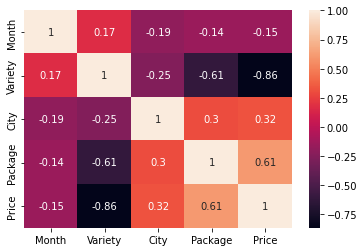

In [ ]:
corr = poly_pumpkins.corr()
sns.heatmap(corr, annot=True)

In [ ]:
X=poly_pumpkins.iloc[:,3:4].values
y=poly_pumpkins.iloc[:,4:5].values

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline.fit(np.array(X_train), y_train)

y_pred=pipeline.predict(X_test)

In [ ]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_pred[:,0]})
df.sort_values(by='x',inplace = True)
points = pd.DataFrame(df).to_numpy()

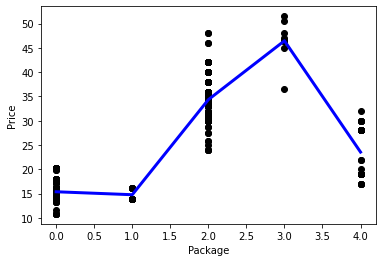

In [ ]:
plt.plot(points[:, 0], points[:, 1],color="blue", linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(X,y, color="black")
plt.show()

In [ ]:
accuracy_score = pipeline.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.8693598306306228
